In [1]:
!pip install optuna

# Метод ближайших соседей

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('/content/drive/MyDrive/ИТМО/Машинное обучение/dataset.csv')
df

,Автор,Название статьи,Категория,Уровень сложности,Время на прочтение (ч.),Количество просмотров (тыс.),Рейтинг,Добавить в закладки,Комментарии
0,Axelus,CRM должна быть CRM-ной,NaN,Простой,0.13,0.080,0,1,0
1,rumin_v_rabote,"О чем пишут программисты, когда хотят найти за...",Аналитика,NaN,0.08,0.051,0,1,0
2,CatWithBlueHat,Кубик в кубе или самоучитель по Kubernetes,Дайджест,Простой,0.08,0.158,0,3,0
3,AndreyMitrofanov,Системы хранения и обработки данных: что предл...,Обзор,Простой,0.13,0.156,-1,1,0
4,TomHunter,Топ самых интересных CVE за октябрь 2023 года,NaN,NaN,0.13,0.126,2,0,0
...,...,...,...,...,...,...,...,...,...
991,akopyl,"Как потратить дни, чтобы сэкономить секунды: п...",Кейс,Средний,0.10,7.700,31,60,17
992,shoom1337,"Сам себе ментор: 12 активностей, чтобы подраст...",Мнение,Простой,0.15,6.500,17,63,4
993,solovevva,Вошел в IT. А что дальше?,Кейс,Простой,0.10,7.900,1,21,10
994,Oksana_Nedvigina,Технологии продления жизни: как развивается 3D...,Аналитика,Простой,0.15,2.200,5,23,1


In [5]:
df = df.drop(['Название статьи', 'Автор'], axis = 1)

In [6]:
df['Уровень сложности'] = df['Уровень сложности'].map({'Простой': 0, 'Средний': 1, 'Сложный': 2})

### Работаем с null в таргете

In [7]:
df = df.dropna(subset=['Уровень сложности'])
df.reset_index(drop=True, inplace=True)
df['Уровень сложности'] = df['Уровень сложности'].astype(int)

<ipython-input-7-08041b48fb4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Уровень сложности'] = df['Уровень сложности'].astype(int)


In [8]:
df['Уровень сложности'].unique()

array([0, 1, 2])

In [9]:
df.isnull().sum()

Категория                       106
Уровень сложности                 0
Время на прочтение (ч.)           0
Количество просмотров (тыс.)      0
Рейтинг                           0
Добавить в закладки               0
Комментарии                       0
dtype: int64

### One hot Encoding

In [10]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(df[['Категория']])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out(['Категория']))
df = pd.concat([df, one_hot_encoded_df], axis=1)
df.drop(columns=['Категория'], inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
df.isnull().sum()

Уровень сложности               0
Время на прочтение (ч.)         0
Количество просмотров (тыс.)    0
Рейтинг                         0
Добавить в закладки             0
Комментарии                     0
Категория_FAQ                   0
Категория_Recovery Mode         0
Категория_Аналитика             0
Категория_Дайджест              0
Категория_Из песочницы          0
Категория_Интервью              0
Категория_Кейс                  0
Категория_Мнение                0
Категория_Обзор                 0
Категория_Перевод               0
Категория_Репортаж              0
Категория_Ретроспектива         0
Категория_Роадмэп               0
Категория_Туториал              0
Категория_nan                   0
dtype: int64

### Нормализация данных

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_normalize = pd.DataFrame(scaler.fit_transform(df.drop(['Уровень сложности'], axis = 1)), columns=(df.drop(['Уровень сложности'], axis = 1)).columns)

In [13]:
df.columns

Index(['Уровень сложности', 'Время на прочтение (ч.)',
       'Количество просмотров (тыс.)', 'Рейтинг', 'Добавить в закладки',
       'Комментарии', 'Категория_FAQ', 'Категория_Recovery Mode',
       'Категория_Аналитика', 'Категория_Дайджест', 'Категория_Из песочницы',
       'Категория_Интервью', 'Категория_Кейс', 'Категория_Мнение',
       'Категория_Обзор', 'Категория_Перевод', 'Категория_Репортаж',
       'Категория_Ретроспектива', 'Категория_Роадмэп', 'Категория_Туториал',
       'Категория_nan'],
      dtype='object')

In [14]:
df[['Время на прочтение (ч.)',
       'Количество просмотров (тыс.)', 'Рейтинг', 'Добавить в закладки',
       'Комментарии', 'Категория_FAQ', 'Категория_Recovery Mode',
       'Категория_Аналитика', 'Категория_Дайджест', 'Категория_Из песочницы',
       'Категория_Интервью', 'Категория_Кейс', 'Категория_Мнение',
       'Категория_Обзор', 'Категория_Перевод', 'Категория_Репортаж',
       'Категория_Ретроспектива', 'Категория_Роадмэп', 'Категория_Туториал',
       'Категория_nan']] = columns_to_normalize

### Разобьем df на тренировочную, валидационную и тестовую части

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Уровень сложности', axis=1).values
y = df['Уровень сложности'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=19)

### Визуализация признаков

In [16]:
df.keys()

Index(['Уровень сложности', 'Время на прочтение (ч.)',
       'Количество просмотров (тыс.)', 'Рейтинг', 'Добавить в закладки',
       'Комментарии', 'Категория_FAQ', 'Категория_Recovery Mode',
       'Категория_Аналитика', 'Категория_Дайджест', 'Категория_Из песочницы',
       'Категория_Интервью', 'Категория_Кейс', 'Категория_Мнение',
       'Категория_Обзор', 'Категория_Перевод', 'Категория_Репортаж',
       'Категория_Ретроспектива', 'Категория_Роадмэп', 'Категория_Туториал',
       'Категория_nan'],
      dtype='object')

In [17]:
data_signs = df[['Время на прочтение (ч.)',
       'Количество просмотров (тыс.)', 'Рейтинг', 'Добавить в закладки',
       'Комментарии', 'Категория_FAQ', 'Категория_Recovery Mode',
       'Категория_Аналитика', 'Категория_Дайджест', 'Категория_Из песочницы',
       'Категория_Интервью', 'Категория_Кейс', 'Категория_Мнение',
       'Категория_Обзор', 'Категория_Перевод', 'Категория_Репортаж',
       'Категория_Ретроспектива', 'Категория_Роадмэп', 'Категория_Туториал',
       'Категория_nan']]

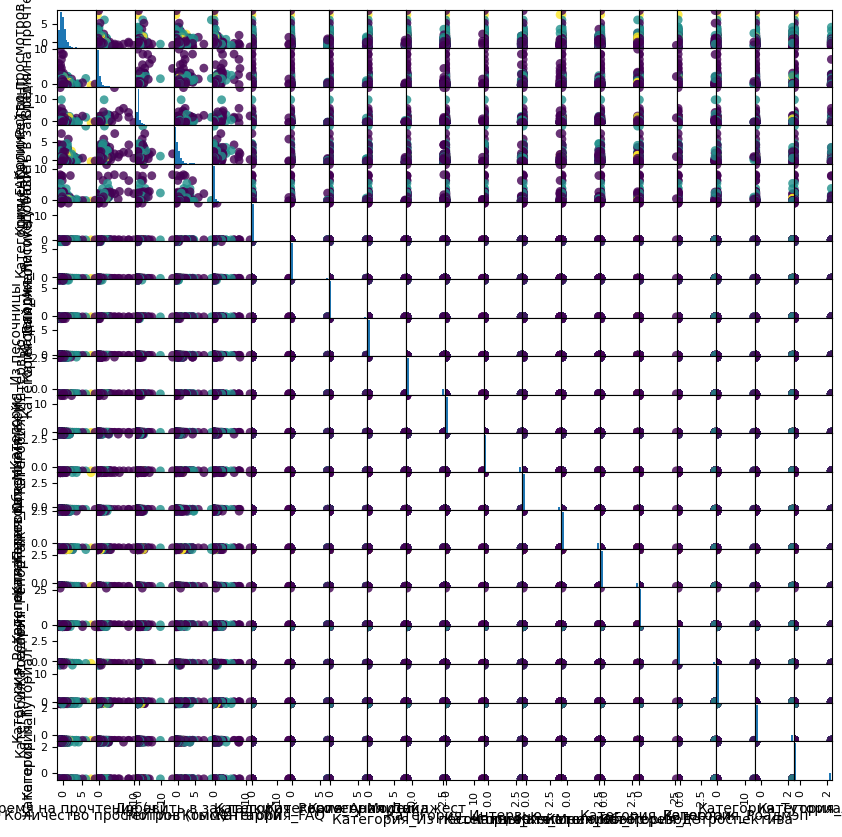

In [18]:
import pandas as pd

df_dataframe = pd.DataFrame(data_signs, columns=['Время на прочтение (ч.)',
       'Количество просмотров (тыс.)', 'Рейтинг', 'Добавить в закладки',
       'Комментарии', 'Категория_FAQ', 'Категория_Recovery Mode',
       'Категория_Аналитика', 'Категория_Дайджест', 'Категория_Из песочницы',
       'Категория_Интервью', 'Категория_Кейс', 'Категория_Мнение',
       'Категория_Обзор', 'Категория_Перевод', 'Категория_Репортаж',
       'Категория_Ретроспектива', 'Категория_Роадмэп', 'Категория_Туториал',
       'Категория_nan'])
scat_mtrx = pd.plotting.scatter_matrix(df_dataframe, c=df['Уровень сложности'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

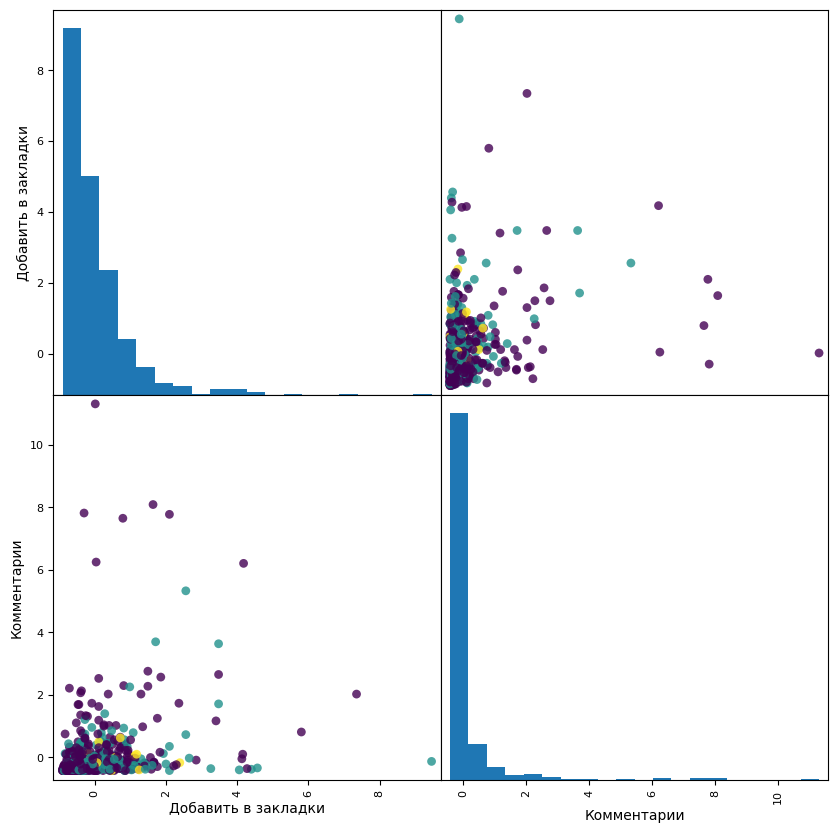

In [19]:
df_dataframe_simple = pd.DataFrame(df_dataframe[['Добавить в закладки', 'Комментарии']], columns=['Добавить в закладки', 'Комментарии'])
scat_mtrx = pd.plotting.scatter_matrix(df_dataframe_simple, c=df['Уровень сложности'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

### KNN

In [20]:
import math

class KNN:
    def __init__(self, n_neighbors = 8, h = None, class_weights = None, kernel = 'Uniform', metric = 'Minkowski', p = 2, a = 2, b = 1, alpha = 0.75, prior_weights=None):
      self.n_neighbors = n_neighbors
      self.h = h
      self.class_weights = class_weights
      self.kernel = kernel
      self.metric = metric
      self.p = p
      self.a = a
      self.b = b
      self.alpha = alpha
      self.prior_weights = prior_weights

    def fit(self, X, y):
        self.X_data = X
        self.y_data = y
        self.y_classes = set(y)

    def predict(self, X):
        prediction = []
        metric_func = self.make_metric(self.metric)
        for elem in X:
            if self.h is not None:
                radius = self.h
            else:
                radius = self.compute_radius(elem, metric_func)
            maximum = 0
            pred = None
            for y_i in self.y_classes:
                sum = 0
                for i in range(len(self.X_data)):
                    if (self.y_data[i] != y_i): continue
                    dist = metric_func(elem, self.X_data[i]) / radius
                    weight = (dist < 1) * self.return_kernel(dist)
                    if self.prior_weights is not None:
                        weight *= self.prior_weights[i]
                    sum += weight
                if sum > maximum:
                    maximum = sum
                    pred = y_i
            if pred is None:
                pred = np.random.choice(list(self.y_classes))
            prediction.append(pred)
        return prediction

    def compute_radius(self, elem, metric_func):
        distances = [metric_func(n, elem) for n in self.X_data]
        distances.sort()
        radius = distances[self.n_neighbors] + 0.001
        return radius

    def score(self, X, y):
        pred = self.predict(X)
        correct=0
        for i in range(len(y)):
          if y[i] == pred[i]:
            correct+=1
        ans = correct/len(y)
        return ans

    def make_metric(self, metric):
        def inner(a, b):
            if metric == 'Minkowski':
              distance = 0
              for i in range(len(a)):
                  distance += abs(a[i] - b[i]) ** self.p
              return distance ** (1 / self.p)
            elif (metric == 'Cosine'):
              distance_numerator = 0
              distance_denominator1 = 0
              distance_denominator2 = 0
              for i in range(len(a)):
                  distance_numerator += (a[i] * b[i])
                  distance_denominator1 += (a[i]) ** 2
                  distance_denominator2 += (b[i]) ** 2
              distance_denominator1 = math.sqrt(distance_denominator1)
              distance_denominator2 = math.sqrt(distance_denominator2)
              return 1 - (distance_numerator/(distance_denominator1 * distance_denominator2))
            elif metric == 'Chebyshev':
              return np.abs(a - b).max()
            else:
              raise Exception()
        return inner

    def return_kernel(self, u, name='Uniform', a=0, b=0):
            if name == 'Gaussian':
                k_u = 1 / (math.sqrt(2 * math.pi)) * math.exp((-1 / 2) * u ** 2)
            elif name == 'Uniform':
                k_u = 1 / 2 if (u < 1) else 0
            elif name == 'Triangular':
                k_u = (1 - abs(u)) if (u < 1) else 0
            elif name == 'Epanechnikov':
                k_u = 3 / 4 * (1 - u ** 2) if (u < 1) else 0
            elif name == 'Common':
                k_u = (1 - (abs(u)) ** a) ** b
            return k_u

In [21]:
model = KNN()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5693430656934306

In [22]:
import optuna

def objective(trial):
    k = trial.suggest_int('k', 1, 20)
    h = trial.suggest_int('h', 0.01, 10)
    kernel = trial.suggest_categorical('kernel', ['Gaussian', 'Uniform', 'Triangular', 'Epanechnikov', 'Common'])
    metric = trial.suggest_categorical('metric', ['Cosine', 'Minkowski', 'Chebyshev']) # chebyshev
    p = trial.suggest_int('p', 1, 5)
    knn = KNN(n_neighbors=k, h = h, kernel = kernel, metric = metric, p = p)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_val, y_val)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40)

print("Best trial:")
best_trial = study.best_trial
print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-04-03 19:21:55,785] A new study created in memory with name: no-name-804062bc-45e2-4b91-85f9-b55049a9c016
[I 2024-04-03 19:21:56,126] Trial 0 finished with value: 0.5727272727272728 and parameters: {'k': 16, 'h': 2, 'kernel': 'Common', 'metric': 'Chebyshev', 'p': 1}. Best is trial 0 with value: 0.5727272727272728.
<ipython-input-20-e1542d0485f4>:35: RuntimeWarning: divide by zero encountered in scalar divide
  dist = metric_func(elem, self.X_data[i]) / radius
[I 2024-04-03 19:21:56,901] Trial 1 finished with value: 0.2727272727272727 and parameters: {'k': 10, 'h': 0, 'kernel': 'Gaussian', 'metric': 'Minkowski', 'p': 2}. Best is trial 0 with value: 0.5727272727272728.
[I 2024-04-03 19:21:57,242] Trial 2 finished with value: 0.5363636363636364 and parameters: {'k': 12, 'h': 8, 'kernel': 'Epanechnikov', 'metric': 'Chebyshev', 'p': 5}. Best is trial 0 with value: 0.5727272727272728.
[I 2024-04-03 19:21:58,341] Trial 3 finished with value: 0.5545454545454546 and parameters: {'k': 3,

Best trial:
  Value:  0.5818181818181818
  Params: 
    k: 3
    h: 2
    kernel: Triangular
    metric: Chebyshev
    p: 2


In [23]:
model = KNN(n_neighbors = 6, h = 3, kernel = 'Gaussian', metric = 'Cosine', p = 4)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6131386861313869

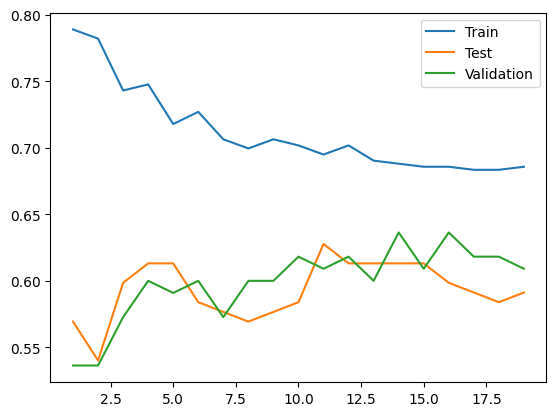

In [24]:
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []
val_accuracy = []
n_neighbors_list = []

for k in range(1, 20):
    model = KNN(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score
    train_accuracy.append(score(X_train, y_train))
    test_accuracy.append(score(X_test, y_test))
    val_accuracy.append(score(X_val, y_val))
    n_neighbors_list.append(k)

plt.plot(n_neighbors_list, train_accuracy, label='Train')
plt.plot(n_neighbors_list, test_accuracy, label='Test')
plt.plot(n_neighbors_list, val_accuracy, label='Validation')
plt.legend()

### Библиотечная реализация

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(accuracy_score(y_test, pred))

0.6131386861313869


In [26]:
import optuna

def objective(trial):
    k = trial.suggest_int('k', 1, 20)
    p = trial.suggest_int('p', 1, 10)
    metric = trial.suggest_categorical('metric', ['cosine', 'minkowski', 'chebyshev'])
    knn = KNeighborsClassifier(n_neighbors=k, p = p, metric=metric)
    knn.fit(X_train, y_train)
    return knn.score(X_val, y_val)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=40)

print("Best trial:")
best_trial = study.best_trial
print("  Value: ", best_trial.value)
print("  Params: ")
for key, value in best_trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-04-03 19:25:13,520] A new study created in memory with name: no-name-fcb141f8-8b78-4e8e-886f-26c66ae153bb
[I 2024-04-03 19:25:13,540] Trial 0 finished with value: 0.6 and parameters: {'k': 6, 'p': 4, 'metric': 'chebyshev'}. Best is trial 0 with value: 0.6.
[I 2024-04-03 19:25:13,573] Trial 1 finished with value: 0.6 and parameters: {'k': 18, 'p': 5, 'metric': 'minkowski'}. Best is trial 0 with value: 0.6.
[I 2024-04-03 19:25:13,592] Trial 2 finished with value: 0.6272727272727273 and parameters: {'k': 20, 'p': 2, 'metric': 'cosine'}. Best is trial 2 with value: 0.6272727272727273.
[I 2024-04-03 19:25:13,619] Trial 3 finished with value: 0.6181818181818182 and parameters: {'k': 15, 'p': 10, 'metric': 'chebyshev'}. Best is trial 2 with value: 0.6272727272727273.
[I 2024-04-03 19:25:13,640] Trial 4 finished with value: 0.6272727272727273 and parameters: {'k': 13, 'p': 6, 'metric': 'cosine'}. Best is trial 2 with value: 0.6272727272727273.
[I 2024-04-03 19:25:13,718] Trial 5 finish

Best trial:
  Value:  0.6363636363636364
  Params: 
    k: 17
    p: 1
    metric: cosine


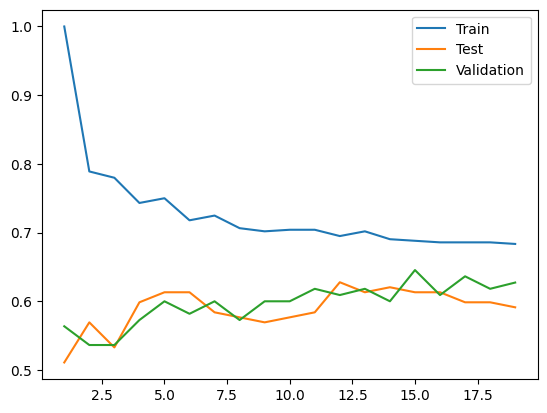

In [27]:
import matplotlib.pyplot as plt

train_accuracy = []
test_accuracy = []
val_accuracy = []
n_neighbors_list = []

for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    score = model.score
    train_accuracy.append(score(X_train, y_train))
    test_accuracy.append(score(X_test, y_test))
    val_accuracy.append(score(X_val, y_val))
    n_neighbors_list.append(k)

plt.plot(n_neighbors_list, train_accuracy, label='Train')
plt.plot(n_neighbors_list, test_accuracy, label='Test')
plt.plot(n_neighbors_list, val_accuracy, label='Validation')
plt.legend()

### LOWESS

In [28]:
import numpy as np

def return_kernel(u, name='Uniform', a=0, b=0):
    if name == 'Gaussian':
        k_u = 1 / (math.sqrt(2 * math.pi)) * math.exp((-1 / 2) * u ** 2)
    elif name == 'Uniform':
        k_u = 1 / 2 if (u < 1) else 0
    elif name == 'Triangular':
        k_u = (1 - abs(u)) if (u < 1) else 0
    elif name == 'Epanechnikov':
        k_u = 3 / 4 * (1 - u ** 2) if (u < 1) else 0
    elif name == 'Common':
        k_u = (1 - (abs(u)) ** a) ** b
    return k_u

def lowess(X, y, knn, kernel='Uniform'):
    weight = []
    for i in range(len(X)):
        knn.fit(np.delete(X, i, axis=0), np.delete(y, i, axis=0))
        y_pred = knn.predict(np.array([X[i]]))[0]
        weight.append(return_kernel(0 if y[i] == y_pred else 1, kernel))
    return weight

In [29]:
prior_weights = lowess(X_train, y_train, KNeighborsClassifier(n_neighbors=3))

In [30]:
model = KNN(prior_weights=prior_weights)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5693430656934306